## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
- as noise goes up, the clusters become less visually distinct. For instance, when noise is at 0.125, there are three very clear clusters for groups a, b, and c. However, as get get to 2.0, the clusters are virtually indistinguishable from one another. 
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
- as noise increases, the elbow in the scree plot is more clear. When noise is smaller, the ability to definitely select a k gets harder because the elbow is more subtle. 
4. Explain the intuition of the elbow, using this numerical simulation as an example.
- A clear elbow means that the marginal benefit of adding a cluster is significant somewhere. Once the vertical height of adding a k is insignificant, it means that increasing k further has stopped significantly improving the fit. Aka, you should choose a k value where the elbow 'bends' the most. 

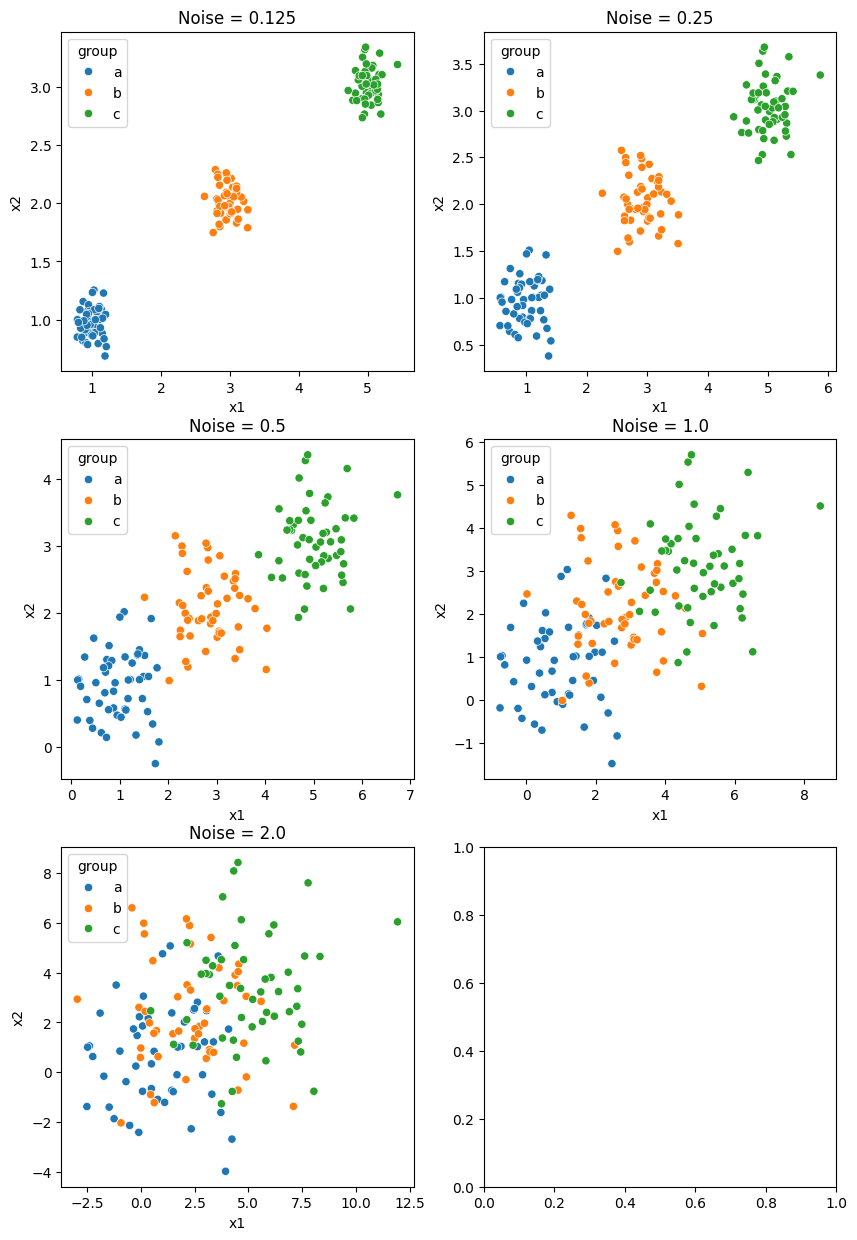

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

fig, axs = plt.subplots(3,2,figsize=(10,15))
sns.scatterplot(x='x1',y='x2',hue='group',data=df0_125,ax=axs[0,0])
axs[0,0].set_title('Noise = 0.125')
sns.scatterplot(x='x1',y='x2',hue='group',data=df0_25,ax=axs[0,1])
axs[0,1].set_title('Noise = 0.25')
sns.scatterplot(x='x1',y='x2',hue='group',data=df0_5,ax=axs[1,0])
axs[1,0].set_title('Noise = 0.5')
sns.scatterplot(x='x1',y='x2',hue='group',data=df1_0,ax=axs[1,1])
axs[1,1].set_title('Noise = 1.0')
sns.scatterplot(x='x1',y='x2',hue='group',data=df2_0,ax=axs[2,0])
axs[2,0].set_title('Noise = 2.0')
plt.show()

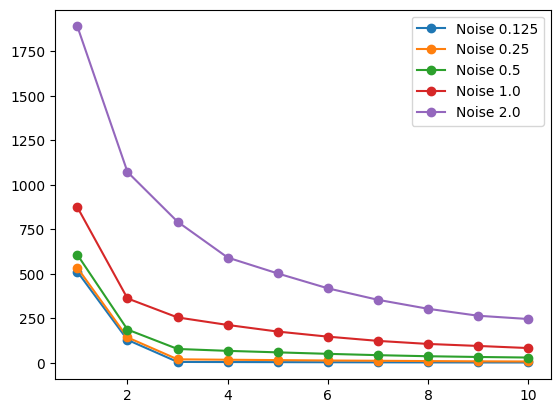

In [21]:
#Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
from sklearn.cluster import KMeans
noises = [df0_125,df0_25,df0_5,df1_0,df2_0]
labels = ['Noise 0.125', 'Noise 0.25', 'Noise 0.5', 'Noise 1.0', 'Noise 2.0']

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

for i in range(5):
    noise = noises[i]
    label = labels[i]
    X = noise[['x1','x2']].values
    k_bar = 10
    SSE = [] # We'll store the training error here
    for k in range(k_bar): # For indices from 0 to k_bar-1
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
        model = model.fit(X) # Fit the model
        SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector
    plt.plot(range(1, k_bar + 1), SSE, marker="o", label=label) # Create scree plot
plt.legend()

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

Price description: 
 count    22010.000000
mean       154.762699
std        148.993525
min         10.000000
25%         85.000000
50%        125.000000
75%        190.000000
max      10000.000000
Name: Price, dtype: float64

Bed description: 
 count    22010.000000
mean         1.556747
std          1.043374
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: Beds, dtype: float64

Number of reviews description: 
 count    22010.000000
mean        16.459382
std         24.230400
min          1.000000
25%          3.000000
50%          7.000000
75%         20.000000
max        257.000000
Name: Number Of Reviews, dtype: float64

Review Scores Rating description: 
 count    22010.000000
mean        91.987915
std          8.860890
min         20.000000
25%         89.000000
50%         94.000000
75%        100.000000
max        100.000000
Name: Review Scores Rating, dtype: float64


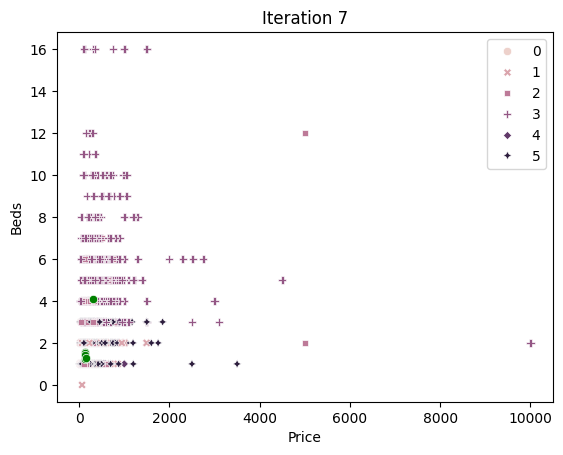

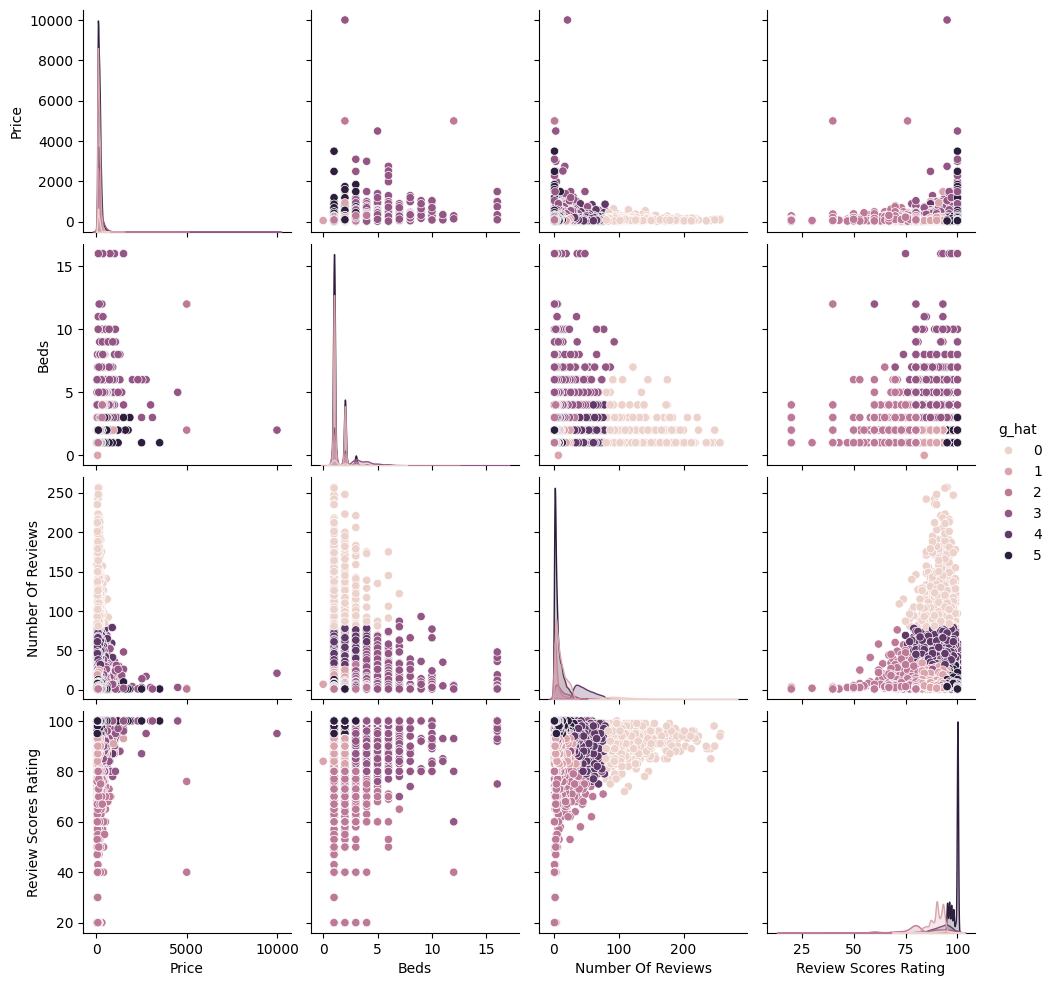

,count,mean,std,min,25%,50%,75%,max
g_hat,,,,,,,,
0,722.0,132.357341,77.865881,29.0,80.0,110.0,168.0,649.0
1,5983.0,134.974762,79.386577,24.0,80.0,120.0,175.0,1495.0
2,2455.0,129.926273,162.134265,20.0,69.0,100.0,160.0,5000.0
3,1701.0,298.046443,355.914160,27.0,150.0,225.0,350.0,10000.0
4,2724.0,140.262115,85.453810,22.0,85.0,120.0,175.0,1000.0
5,8425.0,153.731869,112.725220,10.0,85.0,130.0,195.0,3500.0


In [ ]:
from sklearn.cluster import KMeans
df = pd.read_csv('./data/airbnb_hw.csv')
df = df.dropna() #cleaning nans from rest of vars
df['Price'] = df['Price'].str.replace('$','') #transforming price into int
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].astype(int)
df['Beds'] = df['Beds'].astype(int)
print('Price description: \n', df['Price'].describe())
print('\nBed description: \n', df['Beds'].describe())
print('\nNumber of reviews description: \n', df['Number Of Reviews'].describe())
print('\nReview Scores Rating description: \n', df['Review Scores Rating'].describe())

#maxmin normalize
min_x1 = min(df.loc[:,'Price']) 
max_x1 = max(df.loc[:,'Price'])
min_x2 = min(df.loc[:,'Beds'])
max_x2 = max(df.loc[:,'Beds'])
min_x3 = min(df.loc[:,'Number Of Reviews'])
max_x3 = max(df.loc[:,'Number Of Reviews'])
min_x4 = min(df.loc[:,'Review Scores Rating'])
max_x4 = max(df.loc[:,'Review Scores Rating'])
df.head()
X = df.loc[ : , ['Price','Beds', 'Number Of Reviews', 'Review Scores Rating'] ] # Select data to cluster
X = X.apply(maxmin)
X.head()

model = KMeans(n_clusters=6,random_state=0) # Pass centroids and options into the model
model = model.fit(X) # Initialize a kmc model
df['g_hat'] = model.predict(X) # Predict values
centers = model.cluster_centers_ # Get the computed centers for the kmc model
centroid_x_1 = centers[:,0]*(max_x1-min_x1)+min_x1
centroid_x_2 = centers[:,1]*(max_x2-min_x2)+min_x2
centroid_x_3 = centers[:,2]*(max_x3-min_x3)+min_x3
centroid_x_4 = centers[:,3]*(max_x4-min_x4)+min_x4

this_plot = sns.scatterplot(data=df,x='Price',y='Beds',
                            hue='g_hat',style='g_hat').set_title('Iteration 7')
sns.scatterplot( x=centroid_x_1, y=centroid_x_2, color='green')

sns.pairplot(df.loc[:, ['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating', 'g_hat']], hue='g_hat')
plt.show()

df.groupby('g_hat')['Price'].describe()


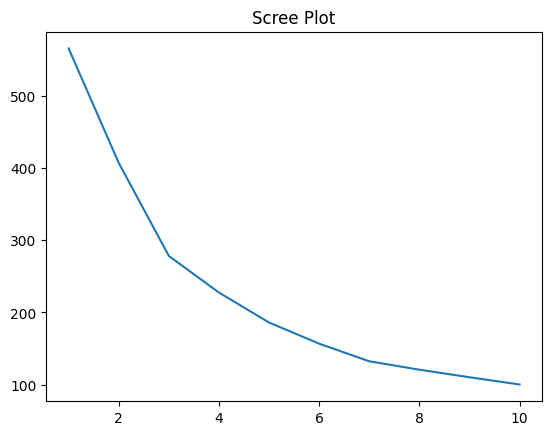

In [ ]:
#scree plot to choose num clusters
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector
scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create scree plot

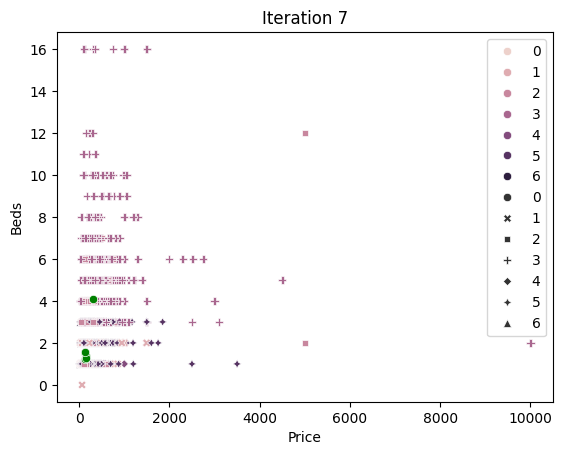

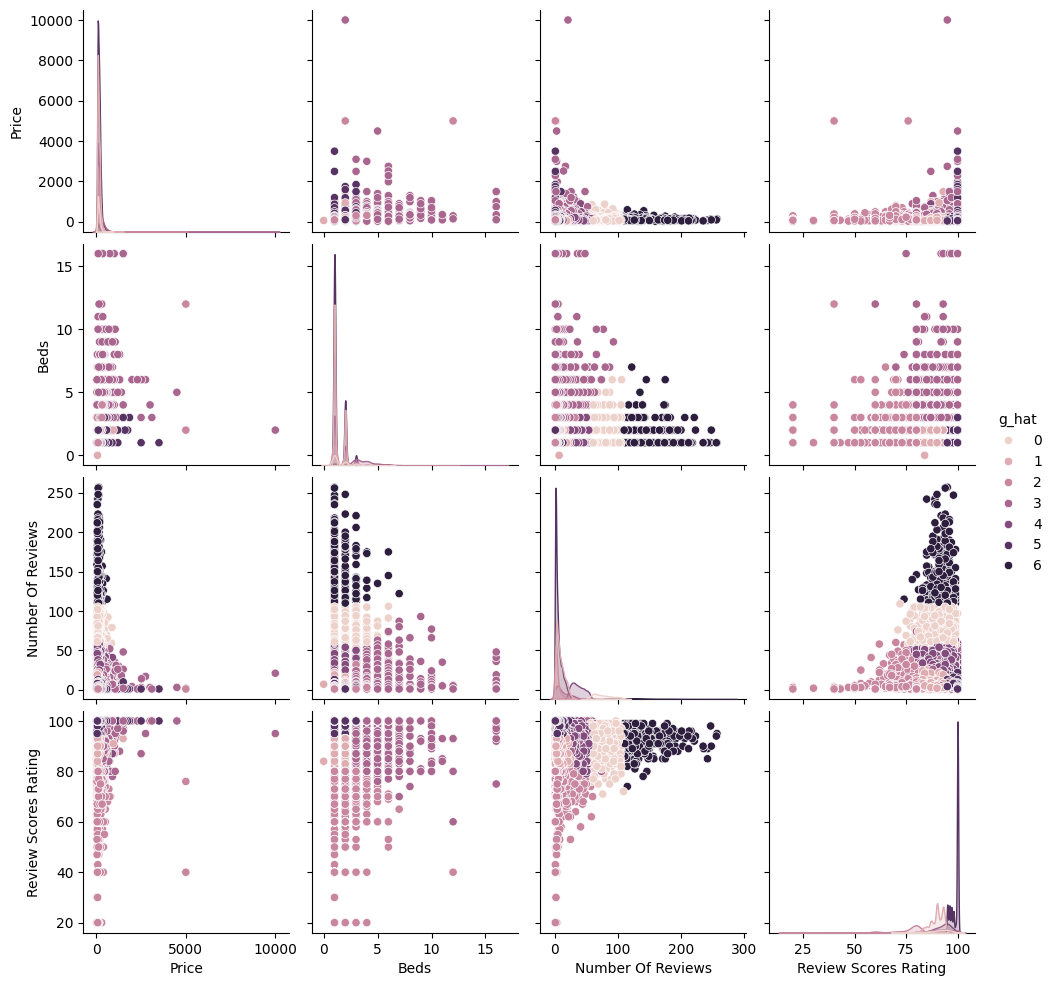

,count,mean,std,min,25%,50%,75%,max
g_hat,,,,,,,,
0,1152.0,138.861111,86.139027,27.0,85.0,120.0,175.00,875.0
1,5493.0,134.614236,79.912809,24.0,80.0,120.0,175.00,1495.0
2,2449.0,129.938342,162.299776,20.0,69.0,100.0,160.00,5000.0
3,1692.0,298.559693,356.637680,27.0,150.0,225.0,350.00,10000.0
4,2807.0,142.021375,83.578548,22.0,87.5,125.0,175.00,1000.0
5,8143.0,153.493553,113.348377,10.0,85.0,130.0,195.00,3500.0
6,274.0,127.697080,74.367858,33.0,79.0,104.5,164.25,600.0


In [ ]:
# repreating steps with 7 clusters from scree plot
model = KMeans(n_clusters=7,random_state=0) 
model = model.fit(X) # Initialize a kmc model
df['g_hat'] = model.predict(X) # Predict values
centers = model.cluster_centers_ # Get the computed centers for the kmc model
centroid_x_1 = centers[:,0]*(max_x1-min_x1)+min_x1
centroid_x_2 = centers[:,1]*(max_x2-min_x2)+min_x2
centroid_x_3 = centers[:,2]*(max_x3-min_x3)+min_x3
centroid_x_4 = centers[:,3]*(max_x4-min_x4)+min_x4

this_plot = sns.scatterplot(data=df,x='Price',y='Beds',
                            hue='g_hat',style='g_hat').set_title('Iteration 7')
sns.scatterplot( x=centroid_x_1, y=centroid_x_2, color='green')

sns.pairplot(df.loc[:, ['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating', 'g_hat']], hue='g_hat')
plt.show()

df.groupby('g_hat')['Price'].describe()

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?